# KITTIMonoDataset

In [3]:
from model_loader import *
from model_utility import *
from torch.utils.data import DataLoader

batch_size = 4
frame_ids  = [-1, 0, 1]

datatype   = ["kitti_benchmark", "kitti_eigen_full", "kitti_eigen_zhou"]
datapath   = "./dataset/kitti"
filepath   = os.path.join("./splits", "kitti_eigen_zhou", "{}_files.txt")


train_filename = readlines(filepath.format("train"))
valid_filename = readlines(filepath.format("val"))
print(len(train_filename))
print(len(valid_filename))


dataset = KITTIMonoDataset(datapath, train_filename, True, frame_ids, ".jpg", 320, 1024, 4)
loader  = DataLoader(dataset, batch_size, shuffle = True, drop_last = True)
sample  = sample_dataset(loader)

39810
4424
>>>  KITTI scaling table
>>>  Is training???    :  True
>>>  Interpolation     :  3
>>>  Scale factor      :  4
>>>  Resolution List   :  [(320, 1024), (160, 512), (80, 256), (40, 128)]
batch sampling time:   0.4547736644744873


torch.Size([4, 3, 320, 1024])
torch.Size([4, 3, 160, 512])
torch.Size([4, 3, 80, 256])
torch.Size([4, 3, 40, 128])
torch.Size([4, 3, 320, 1024])
torch.Size([4, 3, 160, 512])
torch.Size([4, 3, 80, 256])
torch.Size([4, 3, 40, 128])
torch.Size([4, 3, 320, 1024])
torch.Size([4, 3, 160, 512])
torch.Size([4, 3, 80, 256])
torch.Size([4, 3, 40, 128])
torch.Size([4, 1, 375, 1242])
torch.Size([4, 3, 320, 1024])
torch.Size([4, 3, 160, 512])
torch.Size([4, 3, 80, 256])
torch.Size([4, 3, 40, 128])
torch.Size([4, 3, 320, 1024])
torch.Size([4, 3, 160, 512])
torch.Size([4, 3, 80, 256])
torch.Size([4, 3, 40, 128])
torch.Size([4, 3, 320, 1024])
torch.Size([4, 3, 160, 512])
torch.Size([4, 3, 80, 256])
torch.Size([4, 3, 40, 128])
torch.Size([4, 4, 4])
torch.Size([4, 4, 4])
torch.Size([4, 4, 4])
torch.Size([4, 4, 4])
torch.Size([4, 4, 4])
torch.Size([4, 4, 4])
torch.Size([4, 4, 4])
torch.Size([4, 4, 4])


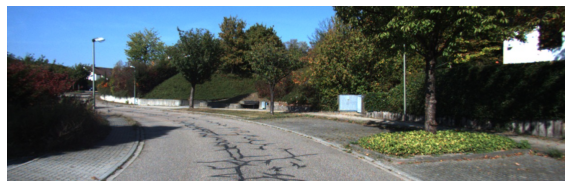

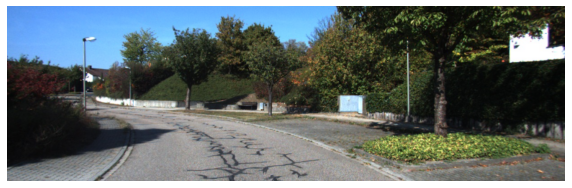

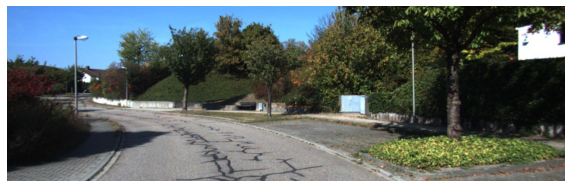

In [3]:
for key in sample:
    print(sample[key].shape)
for ids in frame_ids:
    show_image(sample[("color_aug", ids, 0)][0])